<a href="https://colab.research.google.com/github/Jihaan-Jain/CNN/blob/main/transfer_learning_feature_extraction(data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:07<00:00, 196MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('dogs-vs-cats.zip')
zip_ref.extractall()
zip_ref.close()


In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
conv_base.trainable=False

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [10]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 255ms/step - accuracy: 0.8329 - loss: 0.4060 - val_accuracy: 0.9150 - val_loss: 0.2136
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.9007 - loss: 0.2366 - val_accuracy: 0.9088 - val_loss: 0.2143
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 160s 256ms/step - accuracy: 0.9012 - loss: 0.2287 - val_accuracy: 0.9154 - val_loss: 0.2006
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9085 - loss: 0.2166 - val_accuracy: 0.9076 - val_loss: 0.2115
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 251ms/step - accuracy: 0.9207 - loss: 0.1926 - val_accuracy: 0.9112 - val_loss: 0.2097


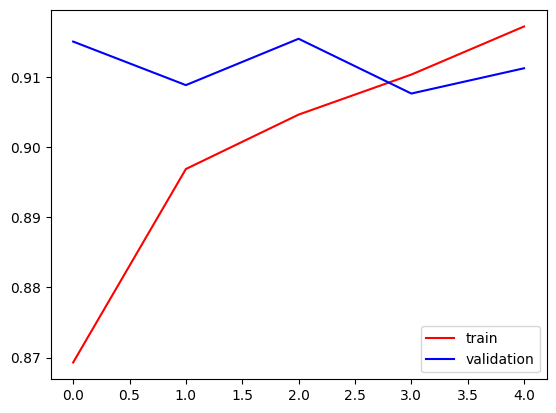

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

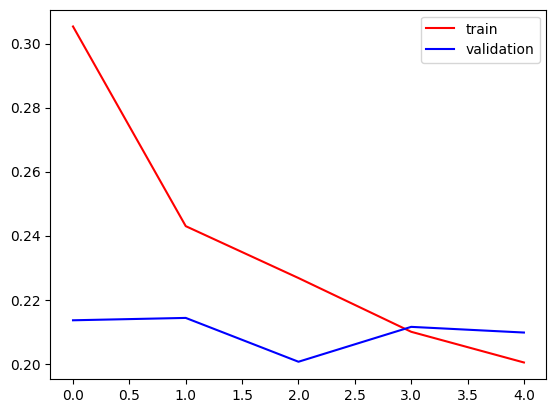

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()